## 8. FitDoublet.ipynb

Experimentation to prove that I know how to do curve fitting.


In [90]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt

import warnings
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines, fit_generic_continuum



# need some of my own functions
base = '/Users/robertseaton/School/github_repos/CGM-learning/code'
if base not in sys.path:
    sys.path.insert(0, os.path.abspath(base))
from bobutils import data_analysis as da

import notebook_utils as nbu # in the current directory


In [91]:
def show_pickled_ion_data(ion_data):
    for z in ion_data:
        print(f"{z=}")
        sightlines = ion_data[z]
        for sl in sightlines:
            print(f"  {sl=}")
            for ion in sightlines[sl]:
                # print(f"    {ion=}: {sightlines[sl][ion].keys()}")
                if ion is not None and (ion == 'CIV 1548' or ion == 'CIV 1550' or ion == 'HI 1215'):
                    print(f"    {ion=}")
                    
def load_and_show_pickled_data():
    ion_data = nbu.load_pickled_ion_data()
    show_pickled_ion_data(ion_data)
    return ion_data

In [98]:
def double_peak_fit():
    # Create a simple spectrum with a Gaussian.
    np.random.seed(42)

    left_min = 2.6
    left_mean = 4.6
    left_stddev = 0.2
    right_mean = 5.5
    right_stddev = 0.2
    right_max = 7.8
    
    cont = models.Const1D(1)
    g1 = models.Gaussian1D(1, left_mean, left_stddev)
    g2 = models.Gaussian1D(.5, right_mean, right_stddev)
    x = np.linspace(0, 10, 200)
    y = cont(x) - g1(x) - g2(x) + np.random.normal(0., 0.05, x.shape)

    # Create the spectrum to fit
    spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

    # fit the continuum
    cont_model = models.Const1D(1)
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
    print(f"{g1_fit=}")
    # Fit each peak
    gl_init = cont_model - models.Gaussian1D(amplitude=1.*u.Jy,
                                             mean=left_mean*u.um, 
                                             stddev=left_stddev*u.um)
    gr_init = cont_model - models.Gaussian1D(amplitude=.5*u.Jy,
                                             mean=right_mean*u.um, 
                                             stddev=right_stddev*u.um)
    gl_fit, gr_fit = fit_lines(spectrum, [gl_init, gr_init], 
                            #    the trick here is to extend left window down and the right window up enough to capture the continuum
                               window=[(left_min*u.um, right_mean*u.um), 
                                       (right_mean*u.um, right_max*u.um)])
    print(f"{gl_fit=}")
    print(f"{gr_fit=}")
    yl_fit = gl_fit(x*u.um)
    yr_fit = gr_fit(x*u.um)

    f, ax = plt.subplots()  
    ax.plot(x, y)  
    ax.plot(x, yl_fit)  
    ax.plot(x, yr_fit)  
    ax.axvline(left_min,ymin=0.8,ymax=1,ls='--',c='r')
    ax.axvline(left_mean,ymin=0,ymax=1,ls='--',c='k')
    ax.axvline(right_mean,ymin=0,ymax=1,ls='--',c='k')
    ax.axvline(right_max,ymin=0.8,ymax=1,ls='--',c='r')
    ax.axvspan(left_mean-left_stddev, left_mean+left_stddev, alpha=0.2, color='tab:gray')
    ax.axvspan(right_mean-right_stddev, right_mean+right_stddev, alpha=0.2, color='tab:gray')


    ax.set_title("Double Peak - Two Models and Two Windows")  
    ax.grid(True)  

g1_fit=<QuantityModel Chebyshev1D(3, c0=1.10816018, c1=-0.12367358, c2=0.00803475, c3=-0.0000957), input_units=um, return_units=Jy>
gl_fit=<CompoundModel(amplitude_0=0.94133894 Jy, amplitude_1=0.94603467 Jy, mean_1=4.60783791 um, stddev_1=0.19221017 um)>
gr_fit=<CompoundModel(amplitude_0=0.99626194 Jy, amplitude_1=0.89933602 Jy, mean_1=5.27348124 um, stddev_1=0.26940215 um)>


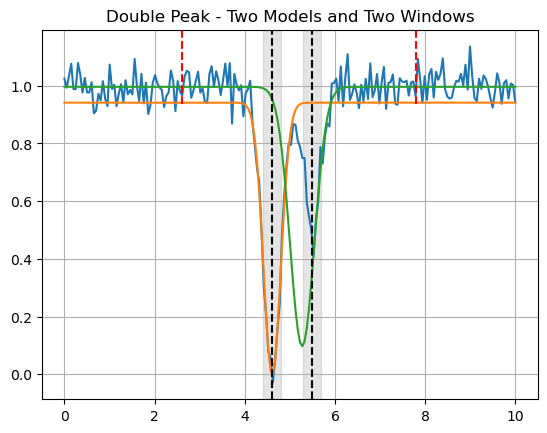

In [99]:
def main():
    double_peak_fit()

if __name__ == '__main__':
    main()